In [7]:
# change notes 11/22/24 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# moved data.yaml, model, and dataset locations to LOCAL dir preventing model training path errors
# updated yaml.data to all 10 construction classes to prevent model training IndexError

# added markdowns
# added suggested WIP
# added new datasets link

# added label dir splitting process
# prevented raw_images and raw_labels from being cleared to keep for multiple runs

# trained model from custom labels and construction dataset labels
# added model result images
# added print for model train execution time
# used model to draw bbox instead of function
# added test image and predicted image *from custom dataset*
# cleared runs and predictions for each execution
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# change notes 11/24/24 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# added image augmentations to custom dataset for model training
# updated model training to 60 epochs from 30 epochs
# updated wip and added 11/24 change notes
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Dataset (2859 raw_images and 2859 raw_labels):

construction_ppe: 2851 images
https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/code
<br>custom dataset: 58 images
<br><br>
download new contstruction+custom "datasets" folder 
<br>to<u><b> local script directory </u></b> (will be ignored to git):
<br>https://uofsandiego-my.sharepoint.com/:f:/g/personal/dverduzco_sandiego_edu/ErhP9WM76B9Ho2PhSeBd13UB0fADbGPbVfGnB6LPDl_kUw?e=mJiznb

suggested WIP: 
<br><b><u>generate graphs based on test data as reference
<br>add live video webcam feed</b></u>

<br>add any further images/ predictions needed
<br>add any further fine tuning on hyperparams
<br>test other models
<br>k-fold cross validation
<br>clean up notebook code, organization of folders/files as needed

# Import Libraries

In [1]:
# import modules
import os # file 
import shutil
import time
import glob
import cv2 # opencv for images
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from ultralytics import YOLO #for obeject detection
import albumentations as A # for image augmentation
from albumentations.pytorch import ToTensorV2 # for image formating
from torchvision.transforms import ColorJitter

import msaai

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

dataset_base_dir = "../datasets"
image_base_dir = dataset_base_dir + "/images"
labels_base_dir = dataset_base_dir + "/labels"

# Define directories to reset
image_dirs = {
    "train": f"{image_base_dir}/train",
    "valid": f"{image_base_dir}/valid",
    "test": f"{image_base_dir}/test",
}
label_dirs = {
    "train": f"{labels_base_dir}/train",
    "valid": f"{labels_base_dir}/valid",
    "test": f"{labels_base_dir}/test",
}

## Clear the "train", "test", "valid" image folders from "datasets" folder

In [2]:
directories_to_reset = list(image_dirs.values()) + list(label_dirs.values())

# Reset directories
msaai.reset_directories(directories_to_reset)

print("Directories reset and ready for use.")

Deleted existing directory: ../datasets/images/train
Recreated directory: ../datasets/images/train
Deleted existing directory: ../datasets/images/valid
Recreated directory: ../datasets/images/valid
Deleted existing directory: ../datasets/images/test
Recreated directory: ../datasets/images/test
Deleted existing directory: ../datasets/labels/train
Recreated directory: ../datasets/labels/train
Deleted existing directory: ../datasets/labels/valid
Recreated directory: ../datasets/labels/valid
Deleted existing directory: ../datasets/labels/test
Recreated directory: ../datasets/labels/test
Directories reset and ready for use.


## Split into train/valid/test files from "raw_image" and "raw_label" folders
### (NOTE: "./datasets/raw_images" and "./datasets/raw_labels" folders must already contain all images and all labels)

In [3]:
source_image_dir = dataset_base_dir + "/raw_images"
source_label_dir = dataset_base_dir + "/raw_labels"

# combine and assign to DataFrame
img_split_df = msaai.img_train_test_split(source_image_dir)

# copy files from source to folders 
msaai.arrange_image_and_label_files(img_split_df, source_image_dir, source_label_dir, image_dirs, label_dirs)


# Augment and replace all custom images

In [4]:
# Directories containing images
folders = [image_dirs["test"], image_dirs["valid"]]

# Get total number of files to process
total_files = sum(
    len([f for f in os.listdir(folder) if f.startswith('scene') and f.endswith(('.jpg', '.png'))]) for folder in folders # modify file desc as needed
)

# Apply transformation to all images in both folders
processed_files = 0
for image_dir in folders:
    for filename in os.listdir(image_dir):
        if filename.startswith('scene') and filename.endswith(('.jpg', '.png')): # modify file desc as needed
            image_path = os.path.join(image_dir, filename)
            image = Image.open(image_path)
            augmented_image = ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)(image)
            augmented_image.save(os.path.join(image_dir, filename))
            processed_files += 1
            print(f'Augmented {processed_files} of {total_files} custom images', end='\r') # modify file desc as needed

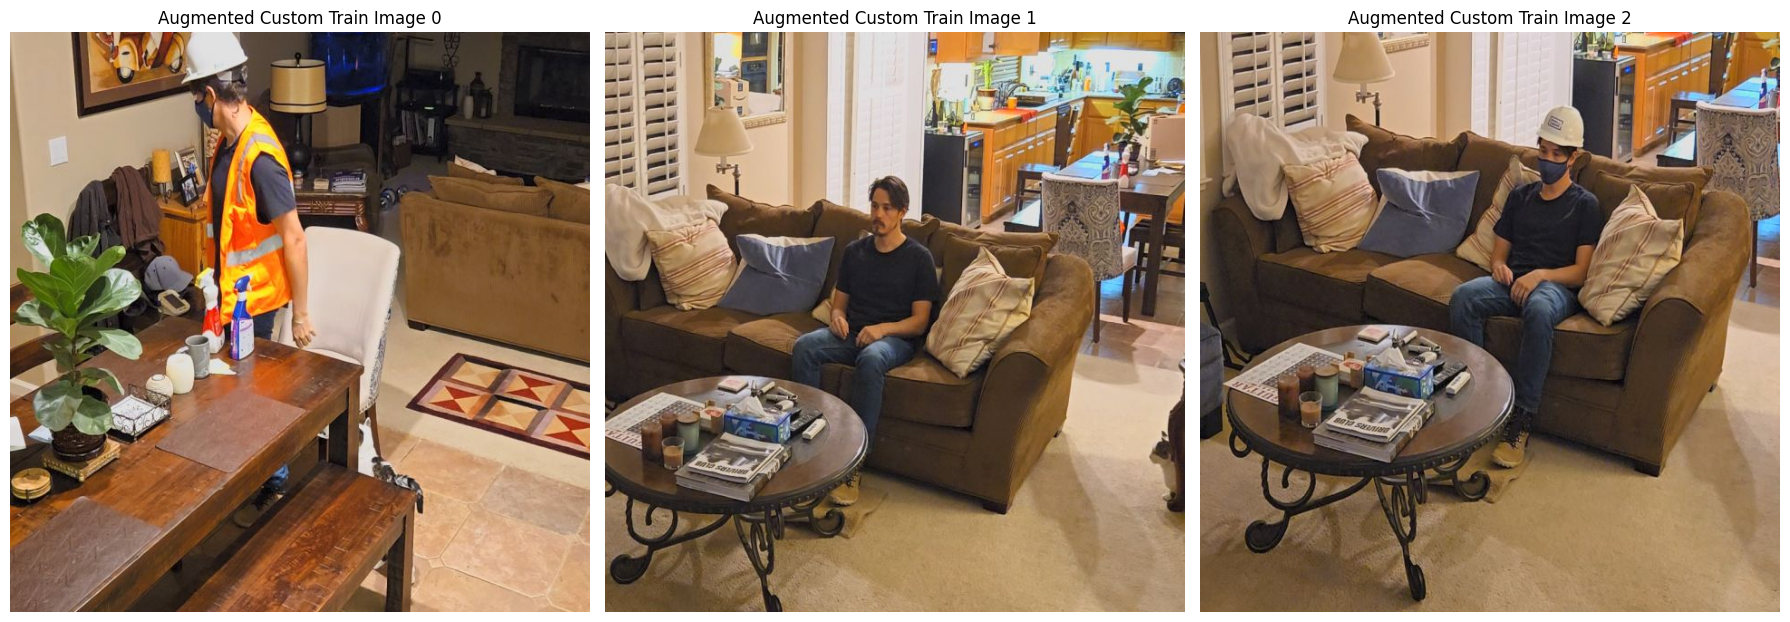

In [5]:
# Get the paths to the first three custom images
image_paths = glob.glob(f"{image_dirs["train"]}/scene*.jpg")[:3]

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Adjust the figsize as needed

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        ax.set_title(f"Augmented Custom Train Image {i}")

    plt.tight_layout()
    plt.show()

# Train YOLOv8 from custom + construction dataset

In [6]:
from pathlib import Path

#resolve yaml path
train_dir = "../train"
data = os.path.join(train_dir, "data.yaml")
yaml_path = str(Path(data).resolve())


# Time count
start = time.time()
for i in range(10000000):
    pass
    
# Delete all previous model runs
shutil.rmtree(f"{train_dir}/runs/", ignore_errors=True)

model = YOLO("../models/yolov8n.pt")
model.train(data=yaml_path, epochs = 50, val = True, agnostic_nms=False, seed=88)

# Time end
end = time.time()
elapsed_seconds = end - start
elapsed_minutes = elapsed_seconds / 60
print(f"Total model train time: {elapsed_minutes:.2f} minutes")

New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.34 🚀 Python-3.12.4 torch-2.5.1 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=../models/yolov8n.pt, data=/Users/victorhugogermano/Development/aai-501-final-project/train/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=88, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

train: Scanning /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/test... 287 images,

train: New cache created: /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/test.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/valid... 571 images, 

val: WARNING ⚠️ /Users/victorhugogermano/Development/aai-501-final-project/datasets/images/valid/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
val: New cache created: /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/valid.cache


Plotting labels to ../train/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to ../train/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.451       3.78      1.546        262        640: 100%|██████████| 18/18 [01:43<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715     0.0419      0.276     0.0794     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       1.36       3.35      1.491        261        640: 100%|██████████| 18/18 [01:54<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.942     0.0569     0.0923      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.365      2.731      1.501        294        640: 100%|██████████| 18/18 [01:57<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.921     0.0952      0.127     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.366      2.453      1.501        323        640: 100%|██████████| 18/18 [02:03<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.266      0.198      0.178     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.337      2.247      1.498        230        640: 100%|██████████| 18/18 [02:07<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.294      0.262      0.211      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.334      2.087      1.469        374        640: 100%|██████████| 18/18 [02:02<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.323      0.315       0.25      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.323      2.032      1.489        259        640: 100%|██████████| 18/18 [01:58<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.336       0.31      0.245      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.29      1.984      1.465        183        640: 100%|██████████| 18/18 [01:55<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.367      0.322      0.275      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.238      1.873      1.434        258        640: 100%|██████████| 18/18 [02:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715       0.46      0.339      0.313      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G       1.25      1.849      1.446        223        640: 100%|██████████| 18/18 [01:56<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.457      0.326      0.315      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.216      1.776      1.412        300        640: 100%|██████████| 18/18 [02:07<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715       0.46       0.36      0.341      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.194      1.694      1.416        252        640: 100%|██████████| 18/18 [02:05<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.523      0.358      0.366      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.196      1.713        1.4        280        640: 100%|██████████| 18/18 [01:59<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.482      0.365      0.373      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.161       1.65      1.378        350        640: 100%|██████████| 18/18 [02:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.494      0.389      0.401      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.145      1.556      1.354        213        640: 100%|██████████| 18/18 [02:04<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.542      0.374      0.387      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.167      1.585      1.363        227        640: 100%|██████████| 18/18 [02:06<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715       0.52      0.387      0.385      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.158      1.546      1.365        356        640: 100%|██████████| 18/18 [02:02<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.535      0.391      0.404      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.139      1.481      1.341        294        640: 100%|██████████| 18/18 [02:09<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.593      0.409      0.437      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.141      1.498      1.353        286        640: 100%|██████████| 18/18 [02:07<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.568      0.411       0.43      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.107      1.462       1.33        240        640: 100%|██████████| 18/18 [01:42<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.595      0.418      0.442      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.086       1.41      1.314        255        640: 100%|██████████| 18/18 [01:48<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.625      0.417      0.456      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.095      1.421      1.316        408        640: 100%|██████████| 18/18 [01:47<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.625      0.431      0.463      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.081       1.34      1.299        305        640: 100%|██████████| 18/18 [01:39<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.604      0.422      0.452      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.059      1.386      1.306        240        640: 100%|██████████| 18/18 [01:41<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.622      0.429      0.469      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.017      1.324      1.273        342        640: 100%|██████████| 18/18 [01:40<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.633      0.434      0.477      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.056      1.333      1.279        190        640: 100%|██████████| 18/18 [01:40<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.633      0.449      0.477      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.021      1.297      1.265        258        640: 100%|██████████| 18/18 [01:40<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.655      0.445      0.482      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.017      1.279      1.265        445        640: 100%|██████████| 18/18 [01:42<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.632      0.438      0.474      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.017      1.282      1.276        214        640: 100%|██████████| 18/18 [01:46<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.631      0.458      0.491      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.011       1.23      1.252        318        640: 100%|██████████| 18/18 [01:44<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.648      0.451      0.491      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9926      1.229      1.247        250        640: 100%|██████████| 18/18 [01:41<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.634      0.442      0.482      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.9977      1.222      1.243        304        640: 100%|██████████| 18/18 [01:44<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.647       0.46      0.501      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.9987      1.209      1.242        326        640: 100%|██████████| 18/18 [01:41<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.655      0.472      0.514      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      0.985      1.168      1.234        394        640: 100%|██████████| 18/18 [01:38<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.673       0.47      0.516      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.006      1.181      1.225        234        640: 100%|██████████| 18/18 [01:43<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.672      0.484      0.521      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      0.952      1.142      1.217        305        640: 100%|██████████| 18/18 [01:41<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.681      0.469      0.521      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       0.95      1.163      1.221        285        640: 100%|██████████| 18/18 [01:44<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.674      0.476      0.525      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9697      1.158      1.228        195        640: 100%|██████████| 18/18 [01:45<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.685      0.478      0.526      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9362      1.108      1.195        265        640: 100%|██████████| 18/18 [01:48<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.679      0.481      0.526      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9406      1.109      1.203        234        640: 100%|██████████| 18/18 [01:40<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.677      0.485      0.531      0.299


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9779       1.21      1.238        137        640: 100%|██████████| 18/18 [01:39<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.665      0.474      0.521      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9579      1.151      1.212        251        640: 100%|██████████| 18/18 [01:56<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.676      0.475      0.521      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9489      1.131      1.224        144        640: 100%|██████████| 18/18 [01:53<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715       0.66      0.493       0.53      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9254       1.07      1.212        187        640: 100%|██████████| 18/18 [01:55<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.696      0.485      0.538      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9219      1.057      1.202        143        640: 100%|██████████| 18/18 [01:58<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715       0.68      0.491      0.538      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9179      1.051      1.198        234        640: 100%|██████████| 18/18 [02:04<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715        0.7      0.489      0.541      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8886      1.008      1.184        221        640: 100%|██████████| 18/18 [01:56<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.691      0.496      0.544      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9008       1.02      1.192        125        640: 100%|██████████| 18/18 [01:57<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.688      0.502      0.547      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8932      1.001      1.178        200        640: 100%|██████████| 18/18 [02:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.694      0.503      0.549      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8955      1.009      1.185        133        640: 100%|██████████| 18/18 [01:56<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/

                   all        571       7715      0.695      0.504      0.551      0.313



50 epochs completed in 3.015 hours.
Optimizer stripped from ../train/runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from ../train/runs/detect/train/weights/best.pt, 6.3MB

Validating ../train/runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.12.4 torch-2.5.1 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/


                   all        571       7715      0.697      0.503       0.55      0.313
               Hardhat        291        684      0.783      0.515      0.588      0.323
                  Mask        231        347      0.891      0.637      0.751      0.458
            NO-Hardhat        288        468      0.653      0.466      0.494      0.235
               NO-Mask        335        682      0.557      0.383       0.39      0.153
        NO-Safety Vest        397        818      0.685      0.523      0.558      0.309
                Person        555       2050      0.765      0.642      0.706      0.461
           Safety Cone        137        634       0.61      0.361      0.354      0.132
           Safety Vest        280        650      0.689       0.52      0.572       0.31
             Machinery        419       1021      0.708      0.703      0.743      0.538
               Vehicle        155        361      0.631       0.28      0.346      0.214
Speed: 1.3ms preproce

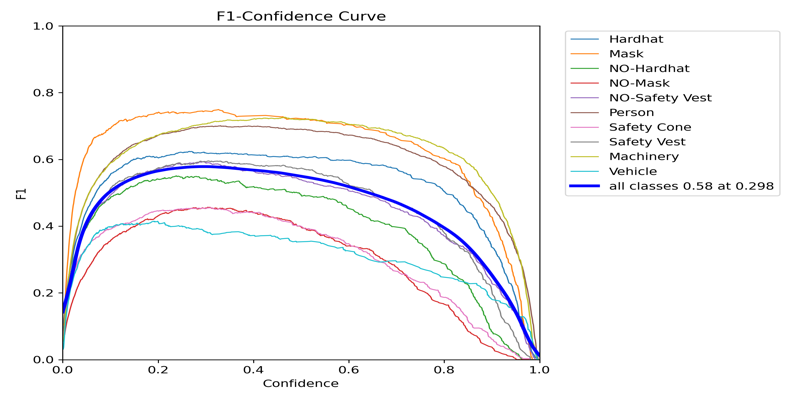

In [7]:
# Show conf curve
image_path = train_dir + "/runs/detect/train/F1_curve.png"
Image.open(image_path).resize((800,400))

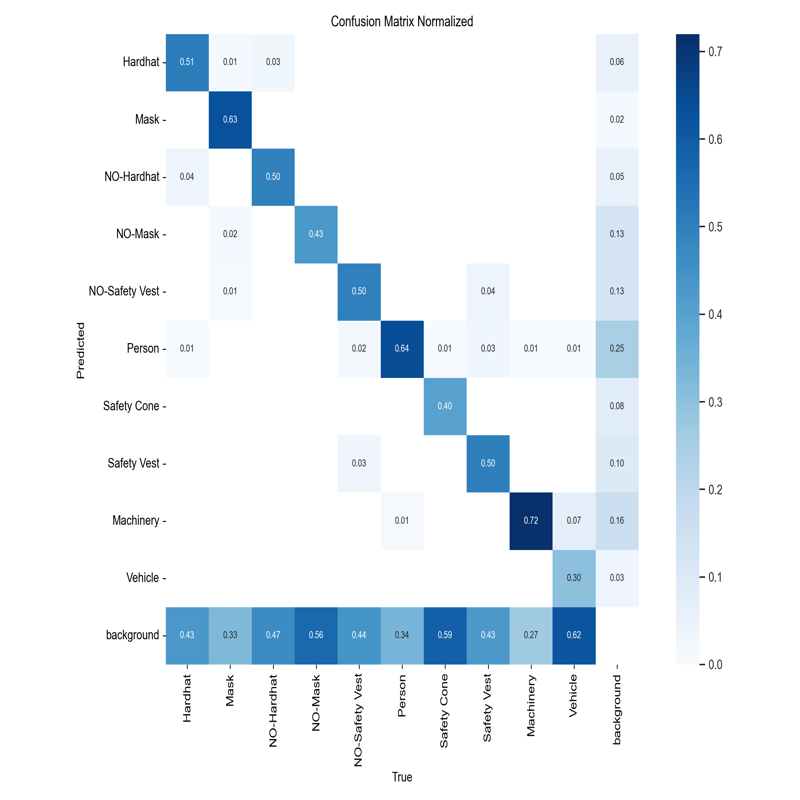

In [11]:
# Show canf matrix
image_path = train_dir + "/runs/detect/train/confusion_matrix_normalized.png"
Image.open(image_path).resize((800,800))

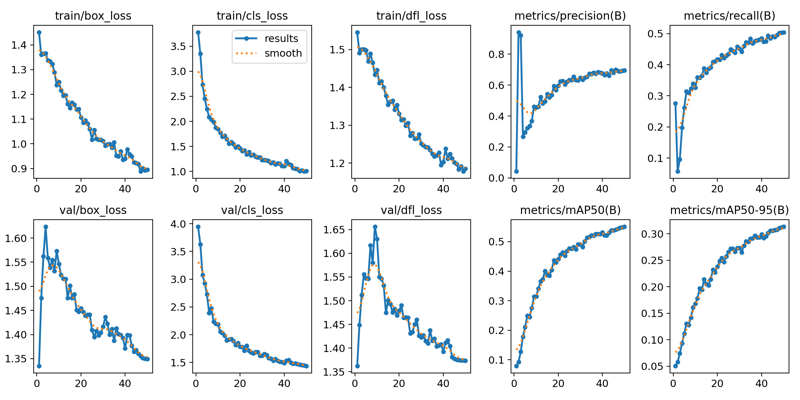

In [12]:
# Show conf curve
image_path = train_dir + "/runs/detect/train/results.png"
Image.open(image_path).resize((800,400))

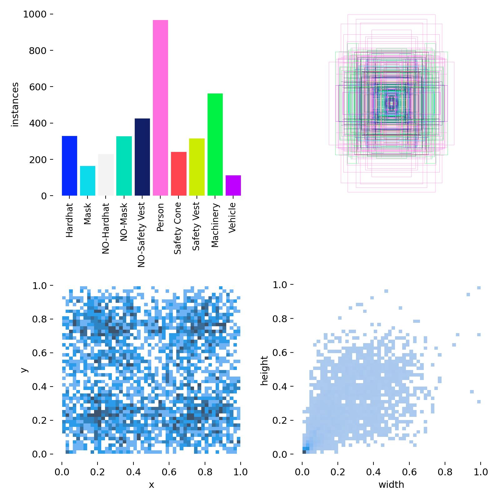

In [13]:
# Show labels diagrams
image_path = train_dir + "/runs/detect/train/labels.jpg"
Image.open(image_path).resize((500,500))

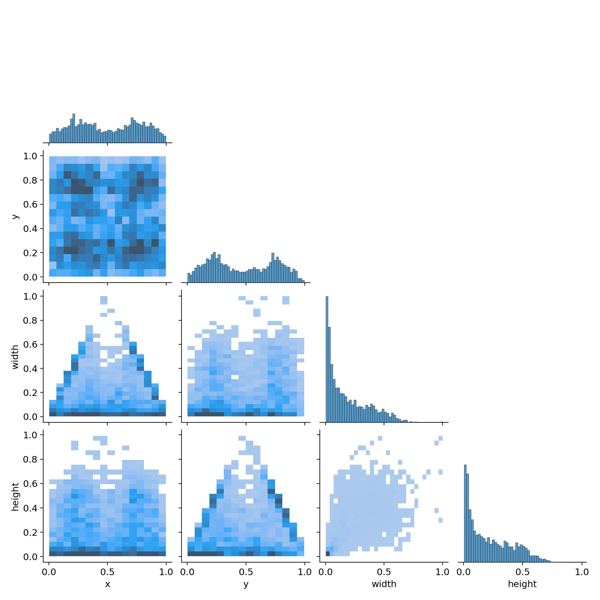

In [14]:
# Show correlogram
image_path = train_dir + "/runs/detect/train/labels_correlogram.jpg"
Image.open(image_path).resize((600,600))

# Images from test folder:

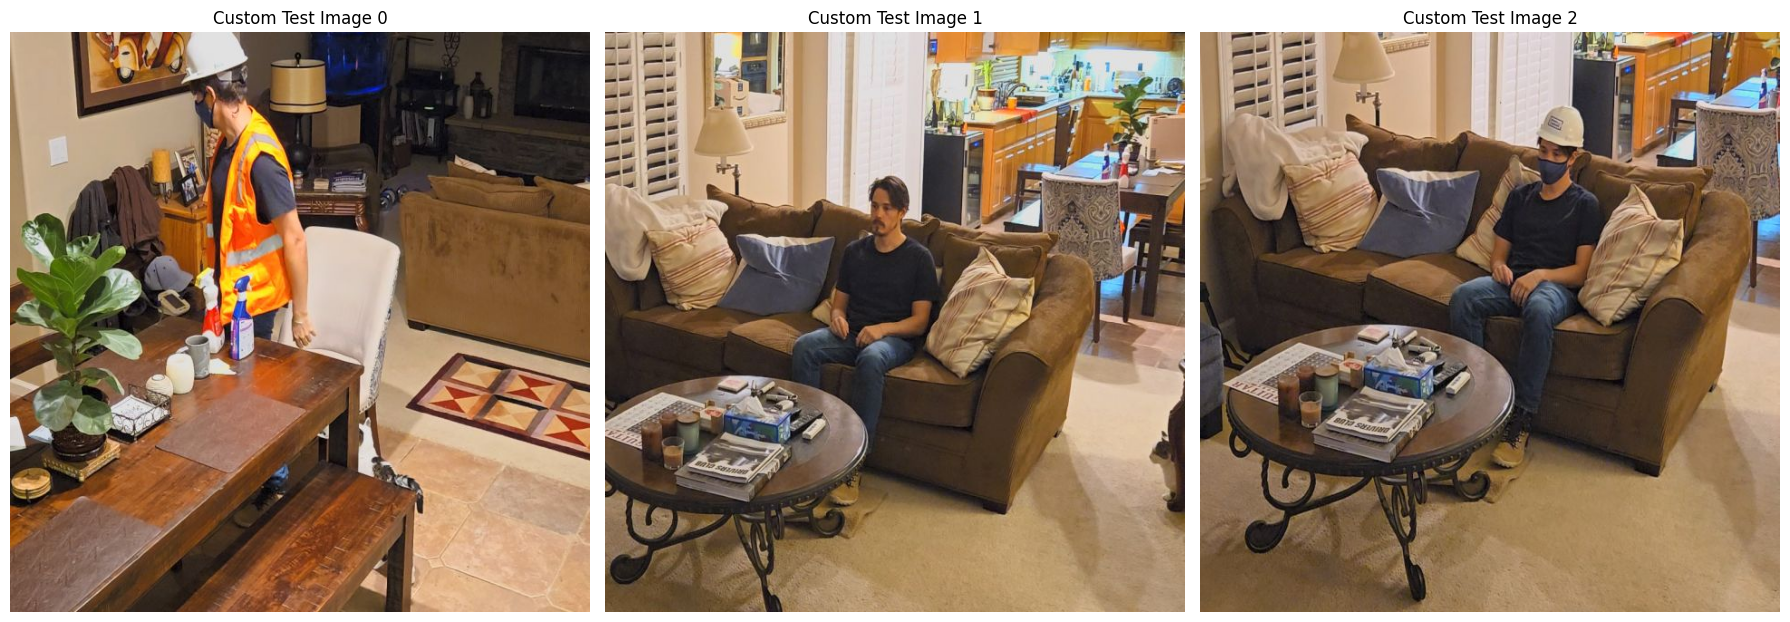

In [18]:
# Get the paths to the first three custom images
image_paths = glob.glob(f"{image_dirs["train"]}/scene*.jpg")[:3] # modify file desc as needed

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Adjust the figsize as needed

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        ax.set_title(f"Custom Test Image {i}") # modify file desc as needed

    plt.tight_layout()
    plt.show()

# Predict test images with fine tuned model (best.pt)

In [19]:
# Remove previous predictions
# Path to the detect folder
detect_path = train_dir + "/runs/detect/"
# Iterate through subdirectories and delete folders starting with "predict"
for folder in os.listdir(detect_path):
    folder_path = os.path.join(detect_path, folder)
    if os.path.isdir(folder_path) and folder.startswith("predict"):
        shutil.rmtree(folder_path, ignore_errors=True)

# model = runs/detect/train/weights/best.pt
model = YOLO(f"{train_dir}/runs/detect/train/weights/best.pt")

# Run inference on any custom image in the test folder
model.predict(f"{image_dirs["test"]}/scene*.jpg", save=True, imgsz=640, conf=0.45, agnostic_nms=True, iou=0.7) # modify file desc as needed


image 1/3 /Users/victorhugogermano/Development/aai-501-final-project/notebooks/../datasets/images/test/scene1_hat_4.jpg: 640x640 1 Hardhat, 1 NO-Safety Vest, 1 Person, 74.0ms
image 2/3 /Users/victorhugogermano/Development/aai-501-final-project/notebooks/../datasets/images/test/scene2_all_3.jpg: 640x640 1 Hardhat, 1 Person, 1 Safety Vest, 55.8ms
image 3/3 /Users/victorhugogermano/Development/aai-501-final-project/notebooks/../datasets/images/test/scene2_mask_4.jpg: 640x640 1 Mask, 1 NO-Hardhat, 1 NO-Safety Vest, 1 Person, 51.6ms
Speed: 2.3ms preprocess, 60.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to ../train/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'Machinery', 9: 'Vehicle'}
 obb: None
 orig_img: array([[[116,  69, 137],
         [110,  63, 131],
         [ 86,  38, 110],
         ...,
         [ 28,  81,  38],
         [ 71, 118,  79],
         [ 80, 127,  89]],
 
        [[116,  69, 137],
         [111,  64, 132],
         [ 86,  38, 110],
         ...,
         [ 53,  97,  61],
         [107, 146, 114],
         [117, 155, 125]],
 
        [[116,  69, 137],
         [112,  65, 133],
         [ 87,  39, 111],
         ...,
         [108, 136, 113],
         [113, 135, 117],
         [ 63,  84,  69]],
 
        ...,
 
        [[ 41,   2,  64],
         [ 42,   3,  65],
         [ 41,   2,  64],
         ...,
         [ 90,  45, 118],
         [ 88,  43, 11

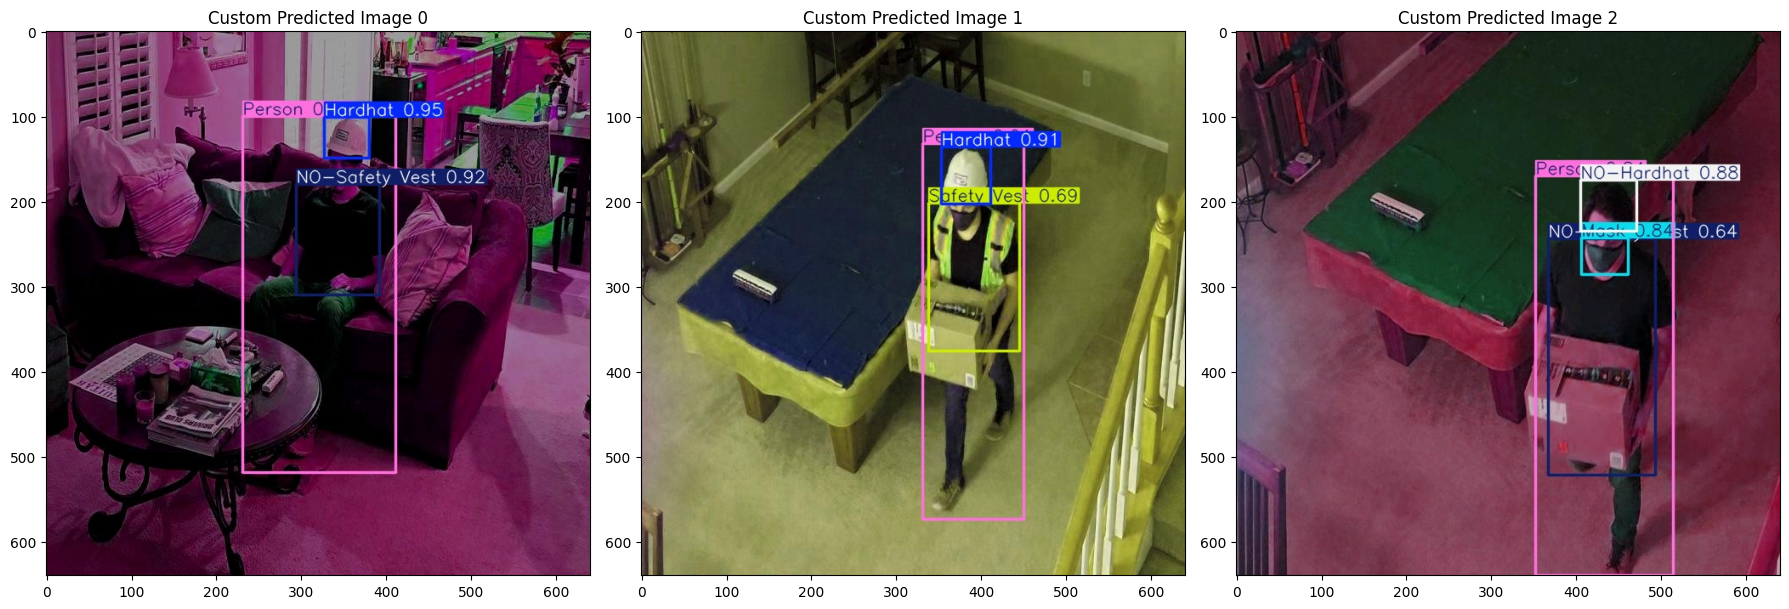

In [21]:
# Get the paths to the first three custom images
image_paths = glob.glob(f"{train_dir}/runs/detect/predict/scene*.jpg")[:3] # modify file desc as needed

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Adjust the figsize as needed

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        # ax.axis('on')  # Hide axes
        ax.set_title(f"Custom Predicted Image {i}") # modify file desc as needed

    plt.tight_layout()
    plt.show()